In [6]:
import pennylane as qml
from pennylane import numpy as np

# ==========================================
# PART 1: THE PERCEPTIVE CORE (QuantumTUI)
# ==========================================
class QuantumTUI:
    def __init__(self, num_qubits=24, backend="default.qubit"):
        self.num_qubits = num_qubits
        self.dev = qml.device(backend, wires=self.num_qubits)
        
        self.mind_wires = list(range(0, 8))
        self.body_wires = list(range(8, 16))
        self.spirit_wires = list(range(16, 24))
        
        # requires_grad=True is the key to allowing backward propagation
        self.params = np.array(np.random.uniform(0.1, 0.8, self.num_qubits), requires_grad=True)
        print("[SYSTEM]: 24-bit TUI Plenum Initialized.")

    def execute_quantum_logic(self, gate_sequence, target_sector="MIND", live_params=None, external_stimulus=None):
        wires = self.mind_wires
        if target_sector == "BODY": wires = self.body_wires
        elif target_sector == "SPIRIT": wires = self.spirit_wires
        
        p = live_params if live_params is not None else self.params

        @qml.qnode(self.dev)
        def circuit(params):
            if external_stimulus is not None:
                qml.RY(external_stimulus * np.pi, wires=wires[0])

            for gate in gate_sequence:
                if gate == "IDENTITY":
                    for i in range(7): qml.Identity(wires=wires[i])
                elif gate == "HADAMARD":
                    for i in range(7): qml.Hadamard(wires=wires[i])
                elif gate == "PAULI_X":
                    for i in range(7): qml.PauliX(wires=wires[i])
                elif gate == "PAULI_Y":
                    for i in range(7): qml.PauliY(wires=wires[i])
                elif gate == "PAULI_Z":
                    for i in range(7): qml.PauliZ(wires=wires[i])
                elif gate == "WAY" or gate == "RY":
                    for i in range(8): qml.RY(params[wires[i]], wires=wires[i])
                elif gate == "CNOT":
                    for i in range(6): qml.CNOT(wires=[wires[i], wires[i+1]])
                elif gate == "SWAP":
                    for i in range(0, 6, 2): qml.SWAP(wires=[wires[i], wires[i+1]])
                elif gate == "RXX":
                    for i in range(6): qml.IsingXX(params[wires[i]], wires=[wires[i], wires[i+1]])
                elif gate == "TOFFOLI":
                    for i in range(0, 5, 2): qml.Toffoli(wires=[wires[i], wires[i+1], wires[7]])
                elif gate == "FRED_KIN":
                    for i in range(0, 5, 2): qml.CSWAP(wires=[wires[7], wires[i], wires[i+1]])

            return qml.probs(wires=wires)

        return circuit(p)

    def evaluate_tension(self):
        @qml.qnode(self.dev)
        def sig_circuit(p):
            for w in [7, 15, 23]: qml.RY(p[w], wires=w)
            qml.CNOT(wires=[7, 15])
            qml.CNOT(wires=[15, 23])
            qml.Toffoli(wires=[7, 15, 23])
            return qml.probs(wires=[7, 15, 23])
        
        probs = sig_circuit(self.params)
        m = float(np.sum([probs[i] for i in range(8) if (i & 4)]))
        b = float(np.sum([probs[i] for i in range(8) if (i & 2)]))
        s = float(np.sum([probs[i] for i in range(8) if (i & 1)]))
        
        var = ((m - b)**2 + (b - s)**2) / 2
        state = "Intensification" if var > 0.02 else "Equilibrium"
        return {"Delta": var, "State": state, "Readout": [m, b, s]}

[SYSTEM]: 24-bit TUI Plenum Initialized.


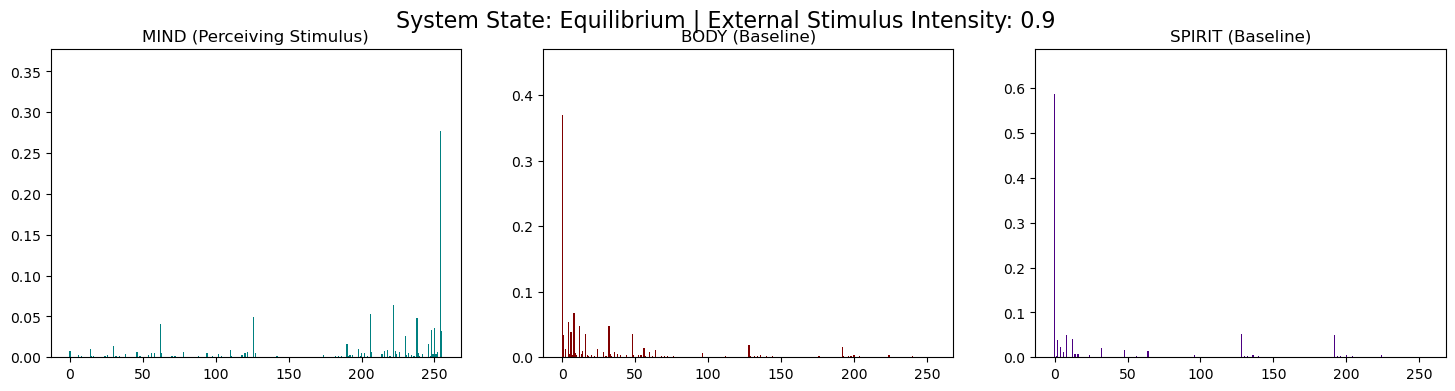

In [7]:
import matplotlib.pyplot as plt

core = QuantumTUI()

# 1. THE EXTERNAL STIMULUS (A value between 0.0 and 1.0)
environmental_event = 0.9 

# 2. Define the internal processing physics
sequence = ["IDENTITY", "CNOT", "RXX", "FRED_KIN", "WAY"]

# 3. Collapse the waves: The Mind receives the external event, Body and Spirit do not.
m_probs = core.execute_quantum_logic(sequence, target_sector="MIND", external_stimulus=environmental_event)
b_probs = core.execute_quantum_logic(sequence, target_sector="BODY")
s_probs = core.execute_quantum_logic(sequence, target_sector="SPIRIT")

tension = core.evaluate_tension()

fig, axs = plt.subplots(1, 3, figsize=(18, 4))
fig.suptitle(f"System State: {tension['State']} | External Stimulus Intensity: {environmental_event}", fontsize=16)

sectors = [("MIND (Perceiving Stimulus)", m_probs), ("BODY (Baseline)", b_probs), ("SPIRIT (Baseline)", s_probs)]
for i, (name, data) in enumerate(sectors):
    axs[i].bar(range(len(data)), data, color='teal' if i==0 else 'maroon' if i==1 else 'indigo')
    axs[i].set_title(f"{name}")
    axs[i].set_ylim(0, max(data) + 0.1)

plt.show()

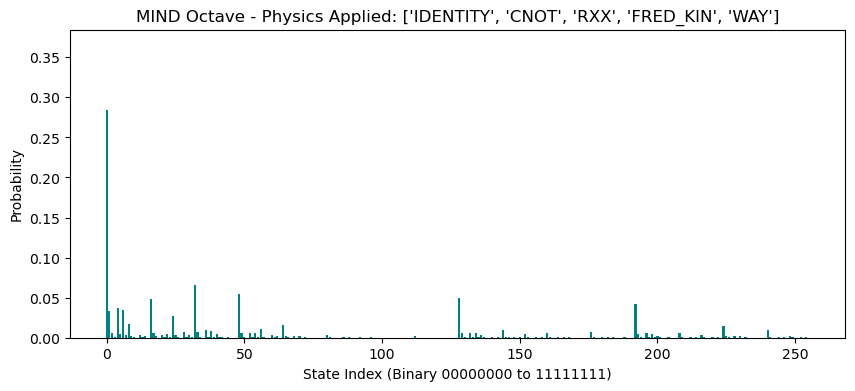

Dominant State Index: 0
Binary Signature: 00000000


In [8]:
# ==========================================
# CELL 2: THE PHYSICS EXPERIMENT
# ==========================================
# Try changing the gates in this list and hit Shift+Enter!
# Available: "IDENTITY", "HADAMARD", "PAULI_X", "CNOT", "SWAP", "TOFFOLI", 
#            "PHASE", "FRED_KIN", "SX", "T_GATE", "WAY"

test_sequence = ["IDENTITY", "CNOT", "RXX", "FRED_KIN", "WAY"] # <--- Change these gates!

# Collapse the wave for just the MIND octave to study it closely
mind_probs = core.execute_quantum_logic(test_sequence, target_sector="MIND")

fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(range(len(mind_probs)), mind_probs, color='teal')
ax.set_title(f"MIND Octave - Physics Applied: {test_sequence}")
ax.set_ylim(0, max(mind_probs) + 0.1)
ax.set_xlabel("State Index (Binary 00000000 to 11111111)")
ax.set_ylabel("Probability")
plt.show()

# Find the dominant active state
particle_index = int(np.argmax(mind_probs))
binary_signature = format(particle_index, '08b')
print(f"Dominant State Index: {particle_index}")
print(f"Binary Signature: {binary_signature}")

In [9]:
# ==========================================
# CELL 3: THE SEMANTIC DECODER
# ==========================================
def decode_state(index):
    """Translates the 8-bit integer back into semantic archetypes."""
    binary = format(index, '08b')
    archetypes = ["Matrix", "Potentiator", "Catalyst", "Experience", "Significator", "Transformation", "Way"]
    
    # Read wires 0-6
    active = [archetypes[i] for i in range(7) if binary[i] == '1']
    
    # Read wire 7 (The Anchor)
    if binary[7] == '1':
        active.append("Choice/Anchor")
        
    return binary, active

# 1. Find the dominant state (the highest peak) for each octave
m_peak = int(np.argmax(m_probs))
b_peak = int(np.argmax(b_probs))
s_peak = int(np.argmax(s_probs))

# 2. Decode them
m_bin, m_active = decode_state(m_peak)
b_bin, b_active = decode_state(b_peak)
s_bin, s_active = decode_state(s_peak)

# 3. Print the Rationale
print(f"=== THE PARTICLE OF INSIGHT ===")
print(f"Physics Applied: {sequence}\n")

print(f"[MIND OCTAVE]   - Peak Index: {m_peak} | Binary: {m_bin}")
print(f"Active Facets:  {', '.join(m_active) if m_active else 'At Rest (Unpolarized)'}\n")

print(f"[BODY OCTAVE]   - Peak Index: {b_peak} | Binary: {b_bin}")
print(f"Active Facets:  {', '.join(b_active) if b_active else 'At Rest (Unpolarized)'}\n")

print(f"[SPIRIT OCTAVE] - Peak Index: {s_peak} | Binary: {s_bin}")
print(f"Active Facets:  {', '.join(s_active) if s_active else 'At Rest (Unpolarized)'}")
print(f"===============================")

=== THE PARTICLE OF INSIGHT ===
Physics Applied: ['IDENTITY', 'CNOT', 'RXX', 'FRED_KIN', 'WAY']

[MIND OCTAVE]   - Peak Index: 254 | Binary: 11111110
Active Facets:  Matrix, Potentiator, Catalyst, Experience, Significator, Transformation, Way

[BODY OCTAVE]   - Peak Index: 0 | Binary: 00000000
Active Facets:  At Rest (Unpolarized)

[SPIRIT OCTAVE] - Peak Index: 0 | Binary: 00000000
Active Facets:  At Rest (Unpolarized)


[SYSTEM]: Initiating Teach/Learn Propagation...
Initial State - Applying Magnitude 0.9 Event
Propagation Step  5 | Systemic Tension: 0.006843
Propagation Step 10 | Systemic Tension: 0.005304
Propagation Step 15 | Systemic Tension: 0.004237
Propagation Step 20 | Systemic Tension: 0.003465
Propagation Step 25 | Systemic Tension: 0.002889
Propagation Step 30 | Systemic Tension: 0.002447
Propagation Step 35 | Systemic Tension: 0.002101
Propagation Step 40 | Systemic Tension: 0.001824
[SYSTEM]: Equilibrium Reached. Learning Integrated.


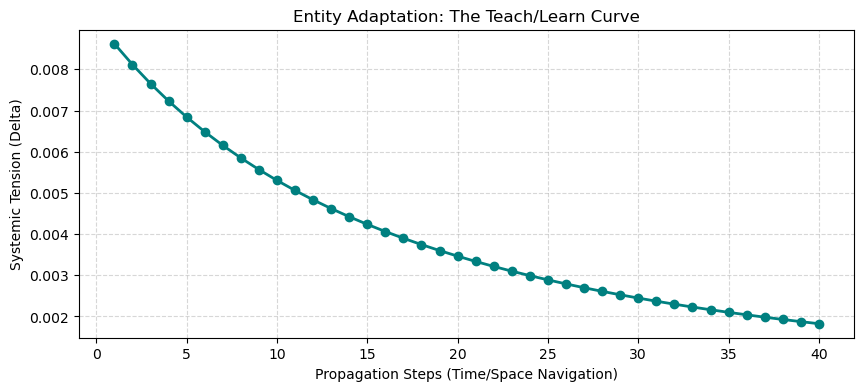

In [10]:
import matplotlib.pyplot as plt
import pennylane as qml
from pennylane import numpy as np

print("[SYSTEM]: Initiating Teach/Learn Propagation...")

# 1. The Space/Time Input (The Catalyst)
environmental_event = 0.9 

# 2. The Optimizer (The Mechanism of Backward Propagation)
opt = qml.GradientDescentOptimizer(stepsize=0.15)
epochs = 40

# 3. The Memory-Prediction Circuit
@qml.qnode(core.dev)
def evaluate_memory_prediction(params):
    # The Space/Time input hits the Matrix
    qml.RY(environmental_event * np.pi, wires=0)
    
    # The Entity applies its current Top-Down Memory (The Way)
    for i in range(24):
        qml.RY(params[i], wires=i)
        
    # The Unity Protocol: Friction bleeds across the domains
    qml.CNOT(wires=[7, 15])
    qml.CNOT(wires=[15, 23])
    
    # We measure the Z-Axis (Time/Space Phase) of the Anchors
    return qml.expval(qml.PauliZ(7)), qml.expval(qml.PauliZ(15)), qml.expval(qml.PauliZ(23))

# 4. The Tension Measurement
def teach_learn_cost(params):
    m_z, b_z, s_z = evaluate_memory_prediction(params)
    # Tension is the variance between Mind, Body, and Spirit predictions
    tension = ((m_z - b_z)**2 + (b_z - s_z)**2) / 2
    return tension

# 5. The Propagation Loop
tension_history = []
print(f"Initial State - Applying Magnitude {environmental_event} Event")

for epoch in range(epochs):
    # The Entity uses forward/backward propagation to adjust its parameters
    core.params, current_tension = opt.step_and_cost(teach_learn_cost, core.params)
    tension_history.append(current_tension)
    
    if (epoch + 1) % 5 == 0:
        print(f"Propagation Step {epoch + 1:2d} | Systemic Tension: {current_tension:.6f}")

print("[SYSTEM]: Equilibrium Reached. Learning Integrated.")

# 6. Visualizing the Paradigm Shift
plt.figure(figsize=(10, 4))
plt.plot(range(1, epochs + 1), tension_history, marker='o', color='teal', linewidth=2)
plt.title("Entity Adaptation: The Teach/Learn Curve")
plt.xlabel("Propagation Steps (Time/Space Navigation)")
plt.ylabel("Systemic Tension (Delta)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()